In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('iris_with_species.csv', index_col=0, header=0) # あやめのデータセットの読み込み

In [3]:
x = dataset.iloc[:,1:]

In [4]:
iris_types = dataset.iloc[:,0]

In [5]:
iris_types

sample1         setosa
sample2         setosa
sample3         setosa
sample4         setosa
sample5         setosa
               ...    
sample146    virginica
sample147    virginica
sample148    virginica
sample149    virginica
sample150    virginica
Name: Species, Length: 150, dtype: object

In [6]:
selected_sample_numbers = [0, 1, 2, 3, 4, 59, 60, 64, 79, 81, 102, 105, 107, 109, 117]
x = x.iloc[selected_sample_numbers]
iris_types = iris_types.iloc[selected_sample_numbers]

In [8]:
autoscaled_x = (x -x.mean()) / x.std()

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [10]:
clustering_results = linkage(autoscaled_x,metric='euclidean',method='ward')

In [11]:
clustering_results

array([[ 0.        ,  4.        ,  0.22415677,  2.        ],
       [ 2.        ,  3.        ,  0.24369657,  2.        ],
       [ 1.        , 16.        ,  0.43744005,  3.        ],
       [ 8.        ,  9.        ,  0.45839588,  2.        ],
       [10.        , 12.        ,  0.48787408,  2.        ],
       [11.        , 19.        ,  0.54372701,  3.        ],
       [ 5.        ,  7.        ,  0.57201419,  2.        ],
       [13.        , 14.        ,  0.75600557,  2.        ],
       [18.        , 21.        ,  1.0899511 ,  4.        ],
       [15.        , 17.        ,  1.50171199,  5.        ],
       [ 6.        , 23.        ,  1.80763621,  5.        ],
       [20.        , 22.        ,  2.44052789,  5.        ],
       [24.        , 25.        ,  5.04549132, 10.        ],
       [26.        , 27.        ,  8.48131124, 15.        ]])

In [13]:
import matplotlib.pyplot as plt

In [15]:
plt.rcParams['font.size'] = 18

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [12.5, 12.5, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [105.0, 105.0, 130.0, 130.0],
  [71.25, 71.25, 117.5, 117.5],
  [26.25, 26.25, 94.375, 94.375]],
 'dcoord': [[0.0, 0.4878740792633688, 0.4878740792633688, 0.0],
  [0.0, 0.5437270124692299, 0.5437270124692299, 0.4878740792633688],
  [0.0, 0.7560055654370165, 0.7560055654370165, 0.0],
  [0.5437270124692299,
   2.4405278876486625,
   2.4405278876486625,
   0.7560055654370165],
  [0.0, 0.22415676556412553, 0.22415676556412553, 0.0],
  [0.0, 0.2436965698713625, 0.2436965698713625, 0.0],
  [0.0, 0.4374400464117441, 0.4374400464117441, 0.2436965698713625],
  [0.22415676556412553,
   1.5017119873211944,
   1.5017119873211944,
   0.4374400464117441],
  [0.0, 0.4583958821

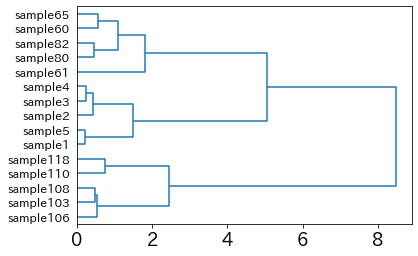

In [18]:
dendrogram(clustering_results, labels=x.index,color_threshold=0,orientation='right')

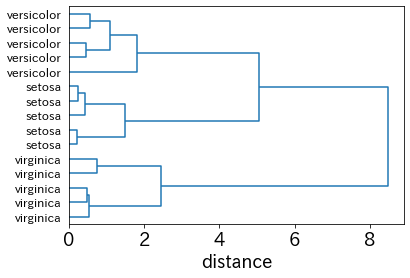

In [17]:
plt.rcParams['font.size'] = 18 # 横軸や縦軸の名前の文字などのフォントのサイズ
dendrogram(clustering_results, labels=iris_types, color_threshold=0, orientation='right') # デンドログラムの作成。labels=iris_types であやめの種類を入れています
plt.xlabel('distance') # 横軸の名前
plt.show()

In [19]:
iris_types

sample1          setosa
sample2          setosa
sample3          setosa
sample4          setosa
sample5          setosa
sample60     versicolor
sample61     versicolor
sample65     versicolor
sample80     versicolor
sample82     versicolor
sample103     virginica
sample106     virginica
sample108     virginica
sample110     virginica
sample118     virginica
Name: Species, dtype: object

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA()

In [22]:
pca.fit(autoscaled_x)

PCA()

In [24]:
score = pd.DataFrame(pca.transform(autoscaled_x))

In [25]:
score.index = x.index

In [26]:
score.columns = ['PC1','PC2','PC3','PC4']

In [28]:
score

,PC1,PC2,PC3,PC4
sample1,-1.579951,-1.243078,-0.137584,-0.036992
sample2,-1.805797,-0.222862,-0.173852,-0.092413
sample3,-1.883085,-0.616435,0.010442,-0.000584
sample4,-1.903255,-0.391414,0.033711,0.087764
sample5,-1.604839,-1.435830,-0.046761,0.028004
sample60,-0.226151,0.743972,0.507239,0.108769
sample61,-0.884744,2.071264,0.079389,0.033688
sample65,-0.126315,0.270299,0.253691,-0.060287
sample80,-0.383541,0.809905,-0.151678,-0.076946
sample82,-0.478904,1.243808,-0.099846,0.023422


In [31]:
pca.explained_variance_ratio_

array([0.72999987, 0.25241467, 0.01602412, 0.00156135])

In [33]:
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)

In [34]:
cumulative_contribution_ratios = contribution_ratios.cumsum() # cumsum() で寄与率の累積和を計算

In [35]:
x_axis = range(1,contribution_ratios.shape[0]+1)

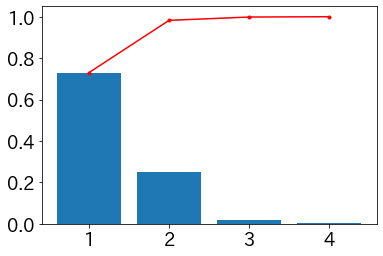

In [36]:
plt.rcParams['font.size']=18
plt.bar(x_axis,contribution_ratios.iloc[:,0],align='center')
plt.plot(x_axis,cumulative_contribution_ratios.iloc[:,0],'r.-')

In [37]:
contribution_ratios

,0
0,0.730000
1,0.252415
2,0.016024
3,0.001561


In [38]:
cluster_numbers = fcluster(clustering_results,3)

In [39]:
cluster_numbers = pd.DataFrame(cluster_numbers)

In [40]:
cluster_numbers

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [41]:
cluster_numbers.index = x.index

In [43]:
cluster_numbers = fcluster(clustering_results, 3, criterion='maxclust') # クラスターの数で分割し、クラスター番号を出力

In [44]:
cluster_numbers

array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1], dtype=int32)

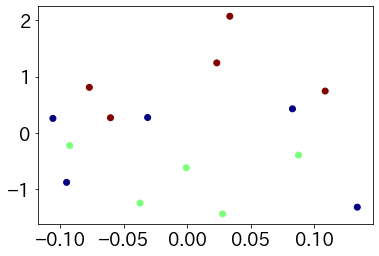

In [49]:

plt.scatter(score.iloc[:, 3], score.iloc[:, 1],  c=pd.DataFrame(cluster_numbers).iloc[:, 0], cmap=plt.get_cmap('jet')) # 散布図の作成。クラスター番号ごとにプロットの色を変えています

In [50]:
dataset = pd.read_csv('virtual_equipment.csv', index_col=0) # 仮想的な装置のデータセットの読み込み

In [51]:
x = dataset.iloc[:,0:2]

In [52]:
x

,T1,T2
0,50.0,70.0
1,51.1,71.1
2,50.4,70.3
3,51.6,71.4
4,50.3,70.1
...,...,...
95,50.3,70.6
96,51.7,71.9
97,50.4,70.7
98,50.3,70.0
